**Use Logistic Regression & Random Forest**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 載入資料集
data = pd.read_csv("data.csv", header=None)

# 將 "?" 取代為 NaN
data.replace('?', np.NaN, inplace = True)

# 更改欄位名稱
data.columns = ['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 
                'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 
                'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']

data.shape # (690, 16)
data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
# testing
ZC_notNA = [not(i) for i in data["ZipCode"].isnull()]
print(ZC_notNA[70:76])
print(data.loc[ZC_notNA,"ZipCode"][70:75].astype(int).astype(object))

[True, False, True, True, True, True]
70    420
72    980
73    400
74    160
75    160
Name: ZipCode, dtype: object


In [5]:
# 將年齡與郵編欄位轉成數值型態
#data[["Age", "ZipCode"]] = data[["Age", "ZipCode"]].apply(pd.to_numeric)
data['Age'] = pd.to_numeric(data['Age'])
# 郵編欄位應是類別變數，因此最後決定還是不改變他的資料型態
#data['ZipCode'] = data.loc[ZC_notNA, 'ZipCode'].astype(int).astype(object)

data.shape # (690, 16)
data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              678 non-null object
Age               678 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [7]:
data.columns
# 性別，年齡，債務，已婚與否，銀行客戶，教育程度，
# 種族，工作年資，事先違約(事前拖欠債務)，受僱，信用評分，
# 駕照，市民，郵政編碼，收入，批准與否

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

# Summary

查看基本統計量，可以發現部分欄位有一些遺缺值，在主要的目標變數Approved可以看出他似乎是個平衡的數據，目標變數”批准”與”拒絕”接近一半一半。

In [8]:
data.describe(include = 'all')

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [9]:
# 各欄位NA的數量
data.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [13]:
# 查看有NA的位置
naRow = data.isnull().sum(axis=1)[data.isnull().sum(axis=1) > 0].index
#naCol = data.isnull().sum()[data.isnull().sum() > 0].index
data.loc[naRow,:]

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,+
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


# Preprocessing

- 將數值欄位的遺缺值用平均值填補。
- 將非連續型的資料用眾數填補。

In [14]:
data.mean()

Age                31.568171
Debt                4.758725
YearsEmployed       2.223406
CreditScore         2.400000
Income           1017.385507
dtype: float64

In [15]:
# 將數值欄位的遺缺值用平均值填補
data.fillna(data.mean(), inplace=True)

In [16]:
# 將非連續型的資料用眾數填補
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(data)

In [17]:
data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,00400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,00000,0,-


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [19]:
print("shape of the data:", data.shape)

shape of the data: (690, 16)


# Visualization

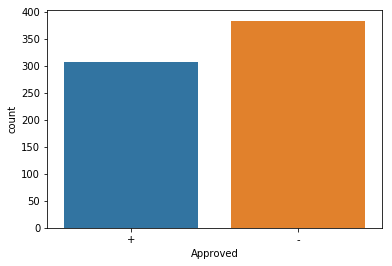

In [20]:
# 批准與拒絕的數量長條圖，看起來資料是平衡的
sns.countplot(data = data, x = 'Approved')

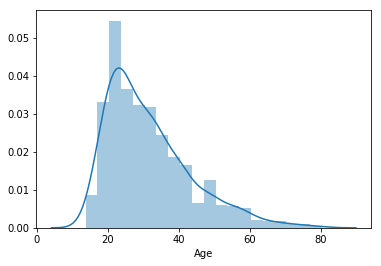

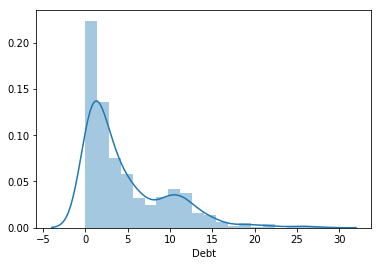

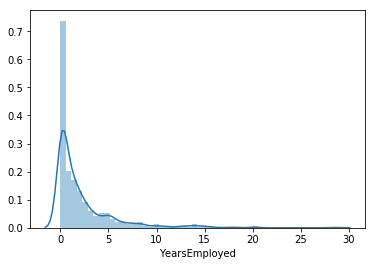

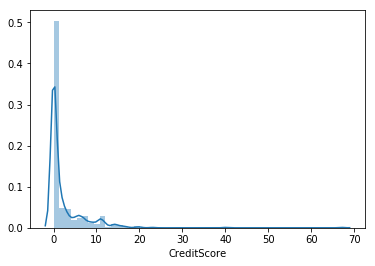

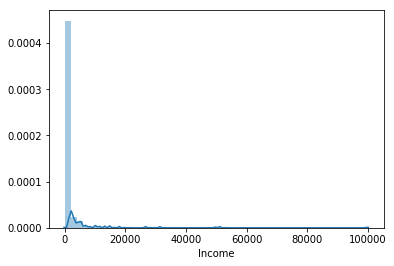

In [21]:
# 各單一變量圖，均是右偏型態
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(data['Age'])
plotDistPlot(data['Debt'])
plotDistPlot(data['YearsEmployed'])
plotDistPlot(data['CreditScore'])
plotDistPlot(data['Income'])

[Text(0, 0.5, 'Age'),
 Text(0, 1.5, 'Debt'),
 Text(0, 2.5, 'YearsEmployed'),
 Text(0, 3.5, 'CreditScore'),
 Text(0, 4.5, 'Income')]

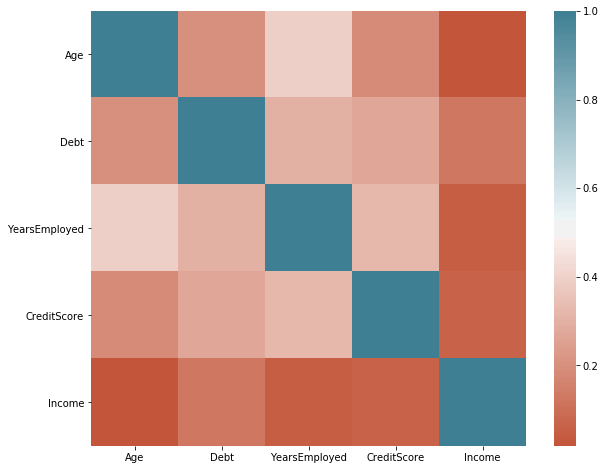

In [22]:
# 相關係數熱圖，年齡與工作年資有比較明顯的正相關
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corrmat, vmax=1, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

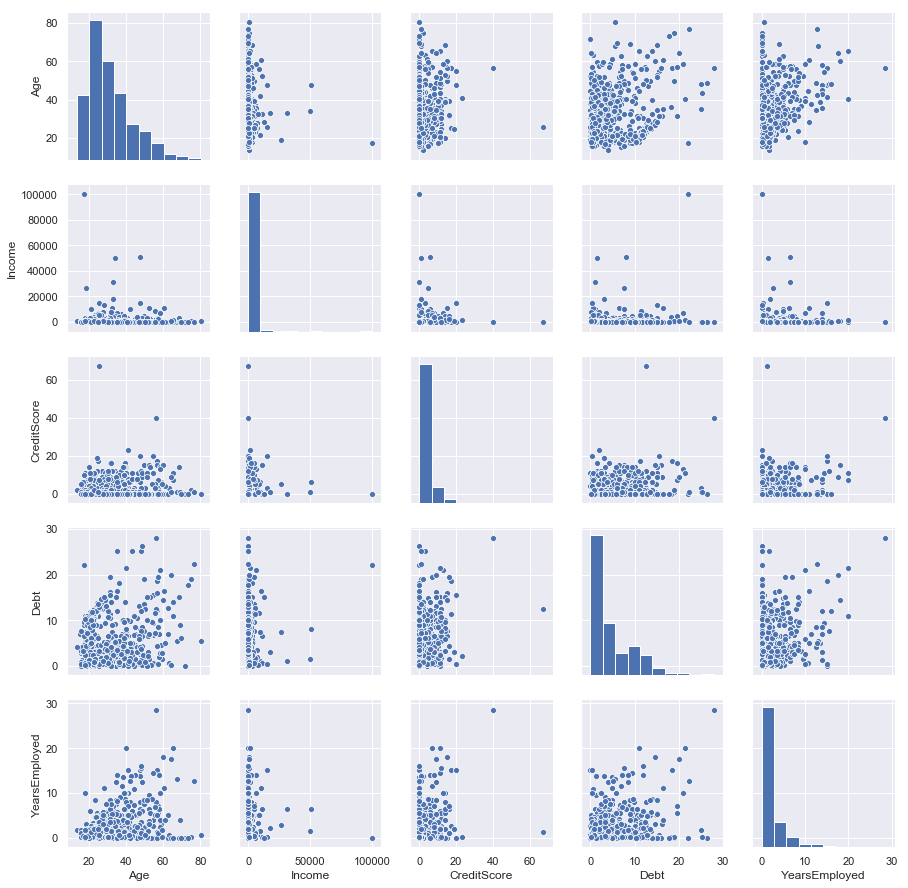

In [23]:
# 繪製散點圖，年齡、年資與債務有較明顯的關係
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(data[cols], size = 2.5)
plt.show();

# Label Encoder

In [24]:
# 針對不連續的資料作標籤編碼
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in data:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [25]:
data.tail()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,90,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,67,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,67,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,96,750,1
689,1,35.00,3.375,1,0,1,3,8.29,0,0,0,1,0,0,0,1


# Split into training/testing & Standardization
- 將資料切分成訓練集與測試集，在做標準化。

In [26]:
from sklearn.model_selection import train_test_split
# 移除不重要的屬性，駕照與郵遞區號
data = data.drop(['DriversLicense', 'ZipCode'], axis=1)

In [27]:
# 將屬性X與標籤y分開
X,y = data.iloc[:,0:13] , data.iloc[:,13]

# 切分訓練集(80%)與測試集(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [28]:
# 載入 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# 縮放訓練集與測試集的資料，縮放到0到1的區間
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [29]:
rescaledX = scaler.transform(X)

# Data Modeling and Evaluation

## Logistic Regression

`Logistic Regression` 羅吉斯迴歸:
- 通過將線性輸出轉換成sigmoid函數來實現二元分類，該函數將output在0和1之間進行縮放。

- 此案例會利用羅吉斯迴歸預測信用卡申請是批准或是拒絕，是0還是1。

In [30]:
# 載入羅吉斯迴歸套件 LogisticRegression
from sklearn.linear_model import LogisticRegression

# 使用預設參數值配適模型
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# 載入混淆矩陣套件 confusion_matrix
from sklearn.metrics import confusion_matrix

# 用訓練好的模型預測測試集
logreg_pred = logreg.predict(rescaledX_test)
logreg_probs = logreg.predict_proba(rescaledX_test)
logreg_probs = np.delete(logreg_probs, 0, 1)

# 印出準確度
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, y_test))

# 評估混淆矩陣
confusion_matrix(y_test, logreg_pred)

Logistic regression classifier has accuracy of:  0.8695652173913043


array([[54,  8],
       [10, 66]], dtype=int64)

In [32]:
pd.crosstab(y_test, logreg_pred, 
            rownames=['actual'], 
            colnames=['preds'])

preds,0,1
actual,,
0,54,8
1,10,66


In [33]:
from sklearn import metrics
logreg_fpr, logreg_tpr, thresholds = metrics.roc_curve(y_test, logreg_probs)
logreg_auc = metrics.auc(logreg_fpr, logreg_tpr)
print(logreg_auc)

0.9093803056027163


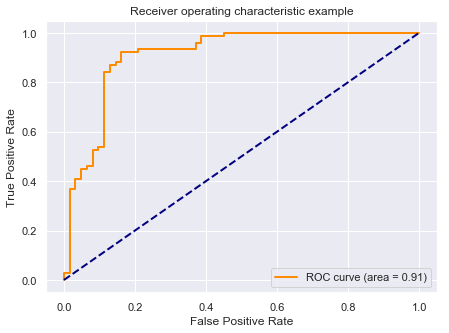

In [34]:
# 印出ROC曲線
fig = plt.figure(figsize=(7,5))
lw = 2
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

- auc接近於1，可見此模型的結果不錯。

In [35]:
X_test.index.size

138

- 查看實際預測的情況與預測出的機率值，門檻值為預設的0.5，低於0.5的被分類為第0類(批准)，高於的則分類為第1類(拒絕)。

In [36]:
# 印出實際y值與預測y值前15筆
df_y = pd.DataFrame({'y_test' :y_test})
df_p = pd.DataFrame({'pred' : logreg_pred})
df = pd.concat([df_y.reset_index(drop=True), df_p], axis=1)
df.head(15)

,y_test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [37]:
y_probs = logreg.predict_proba(rescaledX) # 預測的機率，這邊使用所有樣本
y_class = logreg.predict(rescaledX)

In [38]:
y_probs = np.delete(y_probs, 0, 1)
y_probs

array([[0.16395097],
       [0.14227164],
       [0.32363002],
       [0.14202452],
       [0.29398357],
       [0.38483481],
       [0.2083715 ],
       [0.33516923],
       [0.54761308],
       [0.52570952],
       [0.94058456],
       [0.3665175 ],
       [0.35975034],
       [0.95086669],
       [0.12416582],
       [0.247753  ],
       [0.1599981 ],
       [0.10933013],
       [0.38234282],
       [0.1188228 ],
       [0.12379182],
       [0.31619169],
       [0.11757002],
       [0.11991382],
       [0.14595341],
       [0.12329201],
       [0.11737768],
       [0.10010142],
       [0.15781388],
       [0.12218894],
       [0.13874828],
       [0.12673668],
       [0.11311572],
       [0.30968373],
       [0.12370679],
       [0.13930377],
       [0.13692987],
       [0.12391833],
       [0.25946577],
       [0.11061082],
       [0.13476461],
       [0.11878857],
       [0.16064855],
       [0.12732111],
       [0.08348696],
       [0.1614268 ],
       [0.18046497],
       [0.138

In [39]:
# 0 是批准，1 是拒絕，合併至原本的表中對照
# 機率超過0.5的被分類為1，反之為0
data["Probs"] = np.ravel(y_probs).tolist()
data["Class"] = np.ravel(y_class).tolist()
data.head(15)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved,Probs,Class
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,0,0.163951,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,560,0,0.142272,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,824,0,0.323630,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,0,3,0,0.142025,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,2,0,0,0.293984,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,0,0,0,0.384835,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,0,31285,0,0.208371,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,1349,0,0.335169,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,314,0,0.547613,1
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,0,1442,0,0.525710,1


## Random Forest

隨機森林演算法會對資料從列方向（觀測值方向）與欄方向（變數方向）進行 Bootstrap sampling，得到不同的訓練資料，然後根據這些訓練資料得到一系列的決策樹分類器，假如產生了 5 個決策樹分類器，她們對某個觀測值的預測結果分別為 1, 0, 1, 1, 1，那麼隨機森林演算法的輸出結果就會是 1，這個過程與 Bagging 演算法相同，同樣稱為基本分類器的投票。隨機森林演算法在面對變數具有多元共線性或者不平衡資料（Unbalanced data）的情況時是倍受青睞的演算法。

In [73]:
# 建立 random forest 模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
forest = RandomForestClassifier(n_estimators=800)
forest.fit(rescaledX_train, y_train)

# 預測並印出準確度
rfc_pred = forest.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", forest.score(rescaledX_test, y_test))

# 評估混淆矩陣
print(confusion_matrix(y_test, rfc_pred))

rfc_probs = forest.predict_proba(rescaledX_test)
rfc_probs = np.delete(rfc_probs, 0, 1)
from sklearn import metrics
rfc_fpr, rfc_tpr, thresholds = metrics.roc_curve(y_test, rfc_probs)
rfc_auc = metrics.auc(rfc_fpr, rfc_tpr)
print("auc value: ", rfc_auc)

Random Forest classifier has accuracy of:  0.8623188405797102
[[47 15]
 [ 4 72]]
auc value:  0.9211587436332767


In [74]:
pd.crosstab(y_test, rfc_pred, 
            rownames=['actual'], 
            colnames=['preds'])

preds,0,1
actual,,
0,47,15
1,4,72


- 準確度看不出差異，但隨機森林的auc比羅吉斯略好一些。

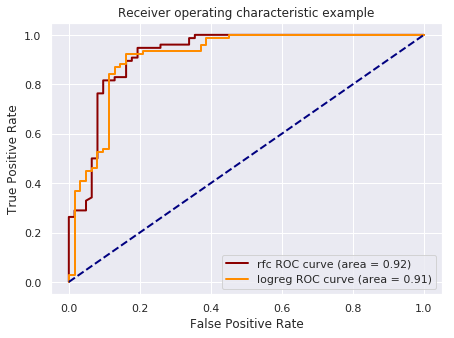

In [75]:
# 與羅吉斯迴歸進行比較並印出兩者的ROC曲線
fig = plt.figure(figsize=(7,5))
lw = 2
plt.plot(rfc_fpr, rfc_tpr, color='darkred', lw=lw, label='rfc ROC curve (area = %0.2f)' % rfc_auc)
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=lw, label='logreg ROC curve (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

根據隨機森林分類器，事前違約是最重要的屬性，其次是信用評分，工作年限，債務，收入和年齡。

Feature ranking:
1. feature 8 (0.286172)
2. feature 7 (0.114395)
3. feature 10 (0.108410)
4. feature 2 (0.102117)
5. feature 12 (0.095511)
6. feature 1 (0.085518)
7. feature 9 (0.068546)
8. feature 5 (0.063158)
9. feature 6 (0.028973)
10. feature 0 (0.014148)
11. feature 3 (0.011547)
12. feature 4 (0.010868)
13. feature 11 (0.010636)


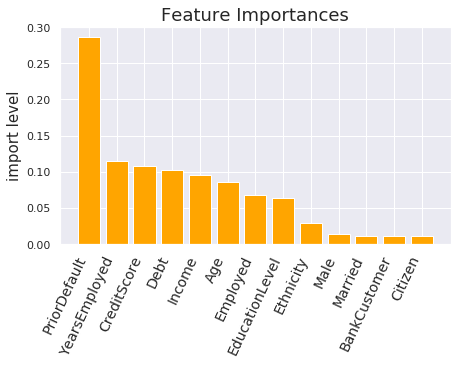

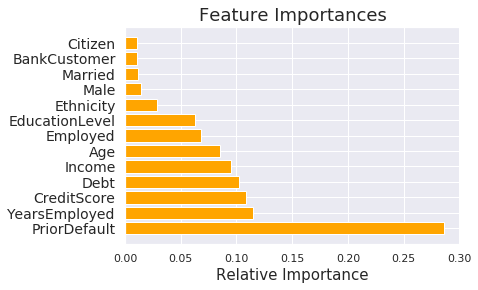

In [92]:
# 取出關於特徵重要程度
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# 印出屬性排名
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# 屬性重要程度圖
features = data.iloc[:,:-1].columns
fig = plt.figure(figsize=(7,4))
plt.rcParams['font.sans-serif'] = ["SimHei"] 
plt.rcParams['axes.unicode_minus'] = False 

# 直
plt.title('Feature Importances', fontsize = 18)
plt.ylabel("import level", fontsize = 15, rotation=90)
plt.bar(range(len(indices)), importances[indices], color='orange', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], 
           rotation=65, ha='right', fontsize=14)
plt.show()

# 橫
plt.title('Feature Importances', fontsize = 18)
plt.xlabel("Relative Importance", fontsize = 15)
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=14)
plt.show()

- 使用sklearn.feature_selection的SelectFromModel套件進行屬性挑選

In [77]:
from sklearn.feature_selection import SelectFromModel

In [78]:
# 選擇特徵重要性為1.25倍均值的特徵
model = SelectFromModel(forest, threshold='1.25*mean',prefit=True)
# 返回所選的特徵
X_trees = model.transform(rescaledX)
print(X_trees.shape)

(690, 4)


In [79]:
cols = model.get_support()
X.columns[cols]

Index(['Debt', 'YearsEmployed', 'PriorDefault', 'CreditScore'], dtype='object')

### 使用挑選過後的屬性再跑一次羅吉斯回歸模型

In [80]:
# 使用預設參數值配適模型
logreg2 = LogisticRegression()
logreg2.fit(rescaledX_train[:,cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# 用訓練好的模型預測測試集
logreg_pred2 = logreg2.predict(rescaledX_test[:,cols])
logreg_probs2 = logreg2.predict_proba(rescaledX_test[:,cols])
logreg_probs2 = np.delete(logreg_probs2, 0, 1)

# 印出準確度
print("Logistic regression classifier(feature selection) has accuracy of: ", logreg2.score(rescaledX_test[:,cols], y_test))

# 評估混淆矩陣
confusion_matrix(y_test, logreg_pred2)

Logistic regression classifier(feature selection) has accuracy of:  0.855072463768116


array([[54,  8],
       [12, 64]], dtype=int64)

- 和原本的羅吉斯迴歸沒有差很多。

In [82]:
pd.crosstab(y_test, logreg_pred2, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,54,8
1,12,64


In [83]:
from sklearn import metrics
logreg_fpr2, logreg_tpr2, thresholds = metrics.roc_curve(y_test, logreg_probs2)
logreg_auc2 = metrics.auc(logreg_fpr2, logreg_tpr2)
print(logreg_auc2)

0.896434634974533


- 比較三種ROC曲線並繪圖，兩條羅吉斯的ROC非相似。

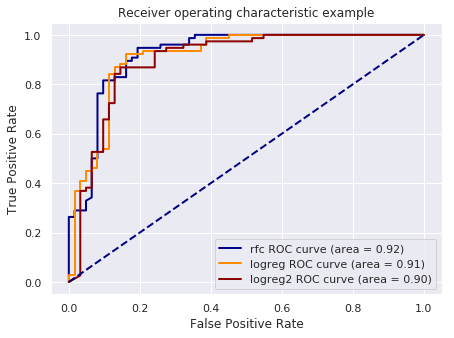

In [84]:
# 印出三條ROC曲線進行比較
fig = plt.figure(figsize=(7,5))
lw = 2
plt.plot(rfc_fpr, rfc_tpr, color='darkblue', lw=lw, label='rfc ROC curve (area = %0.2f)' % rfc_auc)
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=lw, label='logreg ROC curve (area = %0.2f)' % logreg_auc)
plt.plot(logreg_fpr2, logreg_tpr2, color='darkred', lw=lw, label='logreg2 ROC curve (area = %0.2f)' % logreg_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

## Support Vector Machine

- SVM是一種監督式的學習方法，用統計風險最小化的原則來估計一個分類的超平面(hyperplane)，其基礎的概念非常簡單，就是找到一個決策邊界(decision boundary)讓兩類之間的邊界(margins)最大化，使其可以完美區隔開來。
- 這裡使用挑選過的屬性訓練SVM模型

In [85]:
from sklearn import svm, metrics
# 使用預設參數建立 SVC 模型
svc = svm.SVC()
svc.fit(rescaledX_train[:,cols], y_train)

# 預測
svc_pred = svc.predict(rescaledX_test[:,cols])

# 印出準確度
print("Support Vector classifier(feature selection) has accuracy of: ", 
      svc.score(rescaledX_test[:,cols], y_test))

# 評估混淆矩陣
confusion_matrix(y_test, svc_pred)

Support Vector classifier(feature selection) has accuracy of:  0.855072463768116


array([[54,  8],
       [12, 64]], dtype=int64)

In [86]:
pd.crosstab(y_test, svc_pred, 
            rownames=['actual'], 
            colnames=['preds'])

preds,0,1
actual,,
0,54,8
1,12,64


In [87]:
# 印出預測值與實際值做比較
print(svc_pred)
print(y_test.values)

[1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1]
[1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0]


In [88]:
svc_fpr, svc_tpr, thresholds = metrics.roc_curve(y_test, svc_pred)
svc_auc = metrics.auc(svc_fpr, svc_tpr)
print(svc_auc)

0.8565365025466892


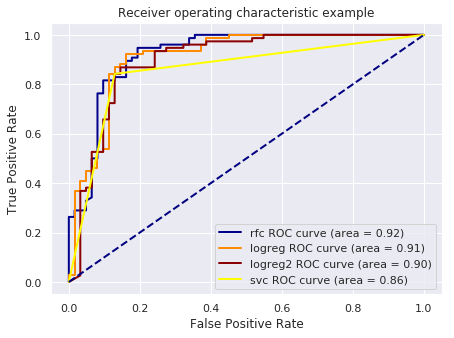

In [89]:
# 印出四條ROC曲線進行比較
fig = plt.figure(figsize=(7,5))
lw = 2
plt.plot(rfc_fpr, rfc_tpr, color='darkblue', lw=lw, label='rfc ROC curve (area = %0.2f)' % rfc_auc)
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=lw, label='logreg ROC curve (area = %0.2f)' % logreg_auc)
plt.plot(logreg_fpr2, logreg_tpr2, color='darkred', lw=lw, label='logreg2 ROC curve (area = %0.2f)' % logreg_auc2)
plt.plot(svc_fpr, svc_tpr, color='yellow', lw=lw, label='svc ROC curve (area = %0.2f)' % svc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()

## 綜合比較與結論

- 印出所有的準確度、AUC和混淆矩陣

In [90]:
def prtRst(name, acc, auc, confmat):
    print("="*35)
    print("＊", name)
    print("   accuracy = ", acc)
    print("   auc value = ", auc)
    for arr in confmat:
        print("  ",arr)
prtRst("Random Forest classifier", forest.score(rescaledX_test, y_test), 
       rfc_auc, confusion_matrix(y_test, rfc_pred))
prtRst("Logistic regression classifier", logreg.score(rescaledX_test, y_test), 
       logreg_auc, confusion_matrix(y_test, logreg_pred))
prtRst("Logistic regression classifier(feature selection)", logreg2.score(rescaledX_test[:,cols], y_test), 
       logreg_auc2, confusion_matrix(y_test, logreg_pred2))
prtRst("Support Vector classifier(feature selection)", svc.score(rescaledX_test[:,cols], y_test), 
       svc_auc, confusion_matrix(y_test, svc_pred))

＊ Random Forest classifier
   accuracy =  0.8623188405797102
   auc value =  0.9211587436332767
   [47 15]
   [ 4 72]
＊ Logistic regression classifier
   accuracy =  0.8695652173913043
   auc value =  0.9093803056027163
   [54  8]
   [10 66]
＊ Logistic regression classifier(feature selection)
   accuracy =  0.855072463768116
   auc value =  0.896434634974533
   [54  8]
   [12 64]
＊ Support Vector classifier(feature selection)
   accuracy =  0.855072463768116
   auc value =  0.8565365025466892
   [54  8]
   [12 64]


- 四類模型都有8成以上的準確度，說明四種模型都有足夠的能力表達資料，前兩種模型由所有屬性去訓練，後兩種模型經過屬性挑選後從原先的15個剩下4個重要程度最高的屬性去訓練。

- 從兩種羅吉斯迴歸模型來觀察，可以發現雖然屬性只剩下四個，但準確度與auc只有降低一點，表示屬性挑選還是有效果，可降低模型的運算負擔。

- SVM也使用挑選過後的屬性去做訓練，然而與前者羅吉斯相較之下效果差不多，auc反而略微降低一些。

- 最後我從混淆矩陣的角度做觀察，可以發現隨機森林在預測信用卡拒絕(不批准)事件相較於其他模型來的好，若以銀行的角度來思考，想信他們會比較在乎應該拒絕的申請反而沒被篩選到的事件，因為風險相對較高，因此從四種模型選擇一類的話，隨機森林會是相對較好的選擇。

- 以上模型還可以再加以改進，隨機森林的參數此處並未做詳細調整，若是經過調參或許會有更好的結果，我的技術尚不純熟，此案例的屬性挑選也有待改進，也許後兩種模型會有改善的空間。